# Report: Impact of fuel prices on traffic count

This report uses open data from Mobilithek (https://mobilithek.info/offers/573289214571900928) to show the traffic count of at a specific road (A73 nearby Nuremberg) and fuel price data from Tankerkönig (https://creativecommons.tankerkoenig.de).

The question is if there is a correlation between fuel price and the amount of traffic volume.

## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [1]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install matplotlib


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load data
Create a pandas dataframe using the local sqlite file.

In [2]:
import pandas as pd

df = pd.read_sql_table('traffic_count', 'sqlite:///data/traffic_count.sqlite')
df.head(10)

,TKNR,Zst,Land,Strklas,Strnum,Datum,Wotag,Stunde,KFZ_R1,KFZ_R2
0,6431,9952,9,A,73,210101,5,1,15,18
1,6431,9952,9,A,73,210101,5,2,31,12
2,6431,9952,9,A,73,210101,5,3,30,27
3,6431,9952,9,A,73,210101,5,4,26,27
4,6431,9952,9,A,73,210101,5,5,29,32
5,6431,9952,9,A,73,210101,5,6,127,103
6,6431,9952,9,A,73,210101,5,7,94,102
7,6431,9952,9,A,73,210101,5,8,110,106
8,6431,9952,9,A,73,210101,5,9,104,96
9,6431,9952,9,A,73,210101,5,10,182,160


## How high is the traffic count in June and is there a relation to fuel prices?
To answer our initial question, we use matplotlib to draw a diagram of all the traffic count at A73 nearby nuremberg in the month of june in the dataset and compare the average fuel prices of 5 gas stations in the area of nuremberg in the same month.

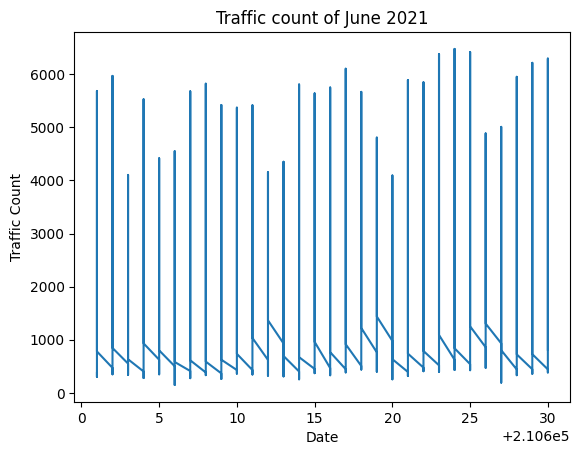

In [3]:

import matplotlib.pyplot as plt

df['KFZ_ANY'] = df['KFZ_R1'].astype(int) + df['KFZ_R2'].astype(int)
index_names = df[df['Datum'] < 210601].index
df.drop(index_names, inplace=True)
index_names = df[df['Datum'] > 210630].index
df.drop(index_names, inplace=True)
x = df['Datum']
y = df['KFZ_ANY']

plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.title('Traffic count of June 2021')
plt.show()



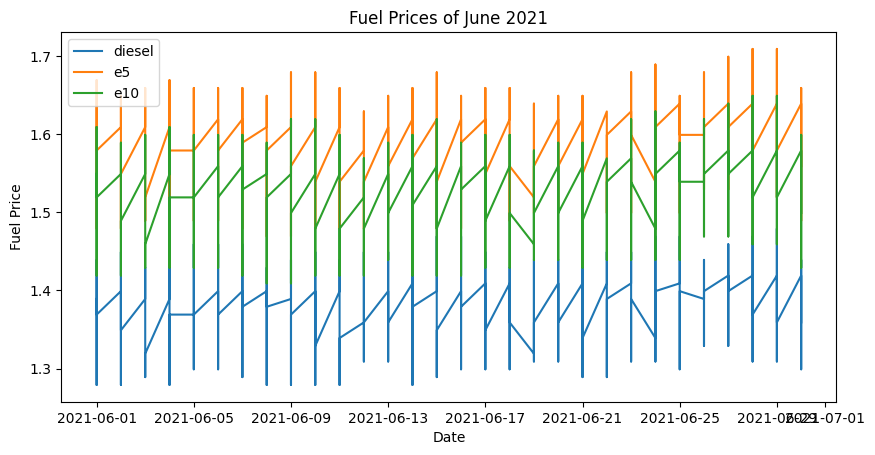

In [4]:
df = pd.read_sql_table('gas_prices', 'sqlite:///data/gas_prices.sqlite')
df['date'] = pd.to_datetime(df['date']).dt.date
x = df['date']
y1 = df['diesel']
y2 = df['e5']
y3 = df['e10']

f = plt.figure()
f.set_figwidth(10)
plt.plot(x, y1, label='diesel')
plt.plot(x, y2, label='e5')
plt.plot(x, y3, label='e10')
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Fuel Prices of June 2021')
plt.legend()
plt.show()

### Conclusion
Unfortunately there is no clear relation between the fuel price and traffic count. However it is visible through the diagram, that the traffic count is lower on weekends and higher on weekdays. The fuel prices are on the higher end in the last week of June. For further analysis there is maybe the need for data over longer periods of time to check if there is a relation. But there are also many more parameters that could play a role for this analysis like societal prosperity, the weather conditions or holidays.